Chapter 2 - Gaussian Bayesian Networks - graphical representation II

The crop data <br>
G = genetic potential <br>
E = environmental potential <br>
V = vegatative mass <br>
N = number of seeds (@ flowering time) <br>
W = average weight (later in plants life) <br>
C = crop

In [ ]:
install.packages(
  "bnlearn",
  repos = "https://cloud.r-project.org",   # CRAN mirror
  dependencies = TRUE                      # pulls in igraph, gRain, etc.
)
library(bnlearn)


  Random/Generated Bayesian network

  model:
   [E][G][V|E:G][N|V][W|V][C|N:W] 
  nodes:                                 6 
  arcs:                                  6 
    undirected arcs:                     0 
    directed arcs:                       6 
  average markov blanket size:           2.67 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  generation algorithm:                  Empty 


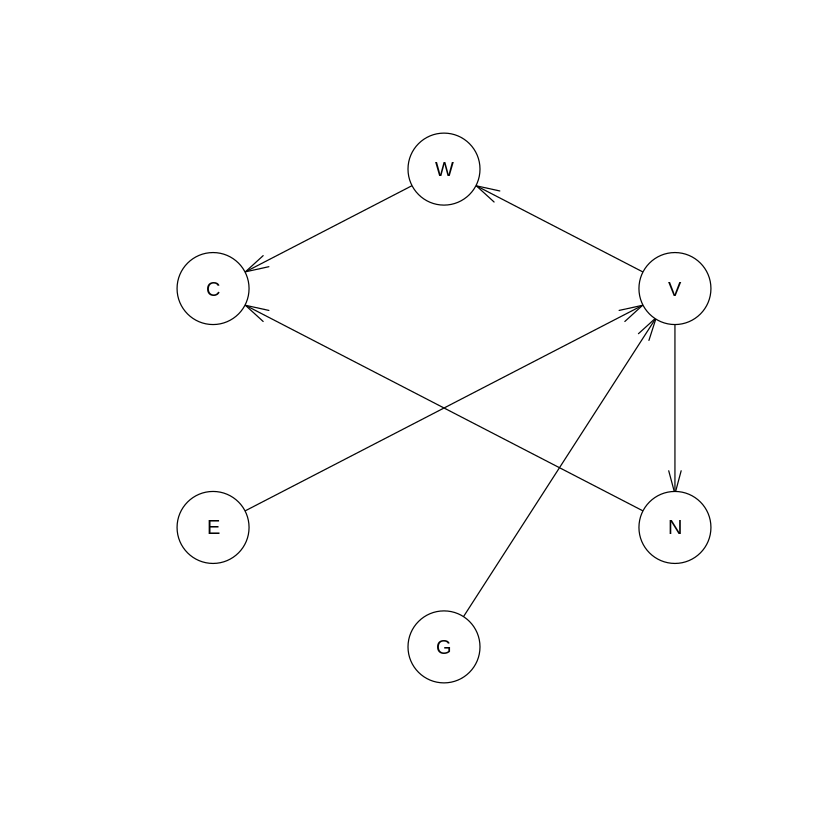

In [7]:
# Specify the BN (from formula --> graph)
dag.bnlearn <- model2network("[G][E][V|G:E][N|V][W|V][C|N:W]")
dag.bnlearn

plot(dag.bnlearn)

In [8]:
# Pull out all of the inpendencies in the graph
node_set <- nodes(dag.bnlearn)
node_set

for (n1 in node_set){
    for (n2 in node_set){
        test <- dsep(dag.bnlearn, n1, n2)
        if (test == TRUE){
            cat(n1, "and", n2, "are independent. \n")
        }
    }
}

[1] "C" "E" "G" "N" "V" "W"

E and G are independent. 
G and E are independent. 


In [9]:
# Now we have information about "V", we want to see how independencies change given V
dsep(dag.bnlearn, "V", "V")

[1] FALSE

Is V d-separated from itself? FALSE. doesn't make sense to have node 2 as V as argument in dsep. we want V to be the conditioning variable, the third variable and take V out of the node set.

In [10]:
# Pull out all of the inpendencies in the graph
node_set <- nodes(dag.bnlearn)
node_set

for (n1 in node_set[node_set != "V"]){
    for (n2 in node_set[node_set != "V"]){
        test <- dsep(dag.bnlearn, x=n1, y=n2, z="V")
        if (test == TRUE){
            cat(n1, "and", n2, "are independent given V. \n")
        }
    }
}

[1] "C" "E" "G" "N" "V" "W"

C and E are independent given V. 
C and G are independent given V. 
E and C are independent given V. 
E and N are independent given V. 
E and W are independent given V. 
G and C are independent given V. 
G and N are independent given V. 
G and W are independent given V. 
N and E are independent given V. 
N and G are independent given V. 
N and W are independent given V. 
W and E are independent given V. 
W and G are independent given V. 
W and N are independent given V. 


In [11]:
# alternative way to take V out of the node set and construct
setdiff(node_set, "V")

[1] "C" "E" "G" "N" "W"

In [12]:
node_set[node_set != "V"]

[1] "C" "E" "G" "N" "W"

In [13]:
# Second way of construction
elim <- c("W", "N")
node_set <- setdiff(node_set, elim) # take out of the set
                                    # that we are considering
node_set

store <- c()
for (n1 in node_set){
    for (n2 in node_set){
        test <- dsep(dag.bnlearn, x = n1, y = n2, z = elim)
        if(test == TRUE){
           cat(n1, "and", n2, "are independent given W and N. \n")
           temp <- c(n1, n2)
           store <- rbind(store, temp)
        }
    }
}


rownames(store) <- NULL
colnames(store) <- c("n1", "n2")
store

[1] "C" "E" "G" "V"

C and E are independent given W and N. 
C and G are independent given W and N. 
C and V are independent given W and N. 
E and C are independent given W and N. 
G and C are independent given W and N. 
V and C are independent given W and N. 


n1,n2
C,E
C,G
C,V
E,C
G,C
V,C


When we say there's independencies we mean info cannot flow from n1 to n2 rather given that "z" node we don't need n1 to know about n2.